In [3]:
# Importing files
from pandas_datareader import data # to get data from online yahoo finance
import matplotlib.pyplot as plt # for plotting 
import pandas as pd # for datasets and data management 
import numpy as np # for calculations 
from sklearn import linear_model # for regression models
from sklearn.metrics import explained_variance_score #for error calculation

In [4]:
def getDataYahoo(symbols,start_date,end_date,paraCol):
    data_source="yahoo"
    panel_data = data.DataReader(symbols, data_source, start_date, end_date)
    df_tmp = panel_data[str(paraCol)]
    all_weekdays = pd.date_range(start=start_date, end=end_date, freq='B')
    df_tmp = df_tmp.reindex(all_weekdays)
    df_clean = dataCleaning(df_tmp)
    return df_clean

def dataCleaning(df):
    df_tmp = df.fillna(method="ffill")
    df_clean = df_tmp.fillna(method="bfill")
    return df_clean

def plotData(df,title="",x="",y=""):
    ax = df.plot(title=title)
    ax.set_xlabel(x)
    ax.set_ylabel(y)
    plt.show()

In [5]:
class LinRegMachineLearner:
    def __init__(self):
        pass
    
    def train(self,x , y):
        regr = linear_model.LinearRegression()
        regr.fit(x[:, np.newaxis], y[:, np.newaxis])
        self.coef = regr.coef_
        self.int = regr.intercept_
        print "Training done."
    
    def predict(self,x):
        print "Prediction done."
        regr = linear_model.LinearRegression()
        regr.coef_ = self.coef
        regr.intercept_ = self.int
        return regr.predict(x[:, np.newaxis])

In [6]:
# Training Dataset Gathering
googleDF = getDataYahoo("GOOG",'2014-01-01','2017-06-01',"Adj Close")
google = googleDF.as_matrix()
spyDF = getDataYahoo("SPY",'2014-01-01','2017-06-01',"Adj Close")
spy = spyDF.as_matrix()

# Corrected Dataset Gathering
newSpyDF = getDataYahoo("SPY",'2017-06-02','2017-09-01',"Adj Close")
newSpy = newSpyDF.as_matrix()
correctGoogleDataDF = getDataYahoo("GOOG",'2017-06-02','2017-09-01',"Adj Close")
correctGoogleData = correctGoogleDataDF.as_matrix()

In [7]:
# Supervised Linear Regression Machine Learning
myMachine = LinRegMachineLearner()
myMachine.train(spy,google)
predictedData = myMachine.predict(newSpy)
predictedData = np.squeeze(predictedData)

Training done.
Prediction done.


Linear Regression Algorithm
--------------------------------------------
Model Training - 1Y 
Model Prediction - 1M


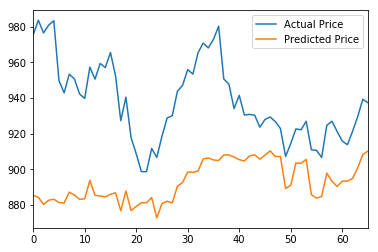

In [8]:
print "Linear Regression Algorithm"
print "--------------------------------------------"
print "Model Training - 1Y \nModel Prediction - 1M"
plotData(pd.DataFrame({'Actual Price':correctGoogleData, 'Predicted Price':predictedData}))

Linear Regression Algorithm
--------------------------------------------
Model Training - 1M 
Model Prediction - 1M


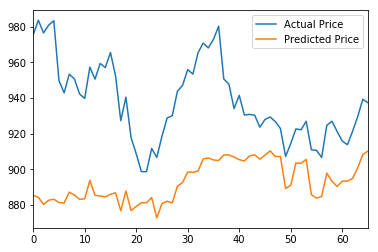

In [9]:
print "Linear Regression Algorithm"
print "--------------------------------------------"
print "Model Training - 1M \nModel Prediction - 1M"
plotData(pd.DataFrame({'Actual Price':correctGoogleData, 'Predicted Price':predictedData}))

Linear Regression Algorithm
--------------------------------------------
Model Training - 6M 
Model Prediction - 3M


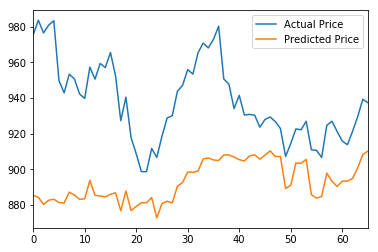

In [10]:
print "Linear Regression Algorithm"
print "--------------------------------------------"
print "Model Training - 6M \nModel Prediction - 3M"
plotData(pd.DataFrame({'Actual Price':correctGoogleData, 'Predicted Price':predictedData}))

Linear Regression Algorithm
--------------------------------------------
Model Training - 2.5Y 
Model Prediction - 3M


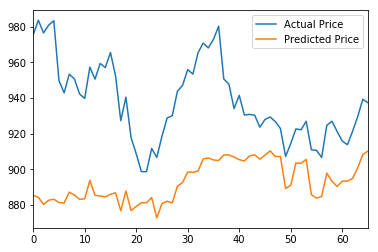

In [11]:
print "Linear Regression Algorithm"
print "--------------------------------------------"
print "Model Training - 2.5Y \nModel Prediction - 3M"
plotData(pd.DataFrame({'Actual Price':correctGoogleData, 'Predicted Price':predictedData}))

Linear Regression Algorithm
--------------------------------------------
Model Training - 1.5Y 
Model Prediction - 3M


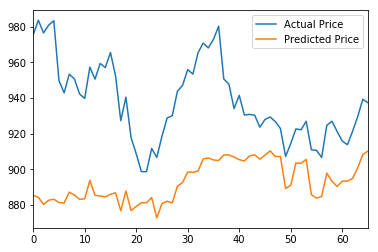

In [12]:
print "Linear Regression Algorithm"
print "--------------------------------------------"
print "Model Training - 1.5Y \nModel Prediction - 3M"
plotData(pd.DataFrame({'Actual Price':correctGoogleData, 'Predicted Price':predictedData}))

Linear Regression Algorithm
--------------------------------------------
Model Training - 3.5Y 
Model Prediction - 3M


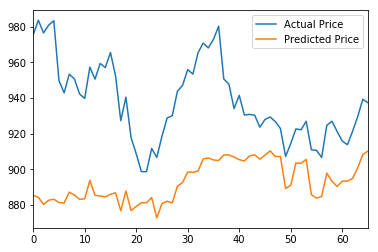

In [13]:
print "Linear Regression Algorithm"
print "--------------------------------------------"
print "Model Training - 3.5Y \nModel Prediction - 3M"
plotData(pd.DataFrame({'Actual Price':correctGoogleData, 'Predicted Price':predictedData}))

In [16]:
y_true = getDataYahoo("GOOG",'2017-06-02','2017-09-01',"Adj Close")
print (y_true)
y_pred = predictedData 
print(y_pred)


2017-06-02    975.599976
2017-06-05    983.679993
2017-06-06    976.570007
2017-06-07    980.940002
2017-06-08    983.409973
2017-06-09    949.830017
2017-06-12    942.900024
2017-06-13    953.400024
2017-06-14    950.760010
2017-06-15    942.309998
2017-06-16    939.780029
2017-06-19    957.369995
2017-06-20    950.630005
2017-06-21    959.450012
2017-06-22    957.090027
2017-06-23    965.590027
2017-06-26    952.270020
2017-06-27    927.330017
2017-06-28    940.489990
2017-06-29    917.789978
2017-06-30    908.729980
2017-07-03    898.700012
2017-07-04    898.700012
2017-07-05    911.710022
2017-07-06    906.690002
2017-07-07    918.590027
2017-07-10    928.799988
2017-07-11    930.090027
2017-07-12    943.830017
2017-07-13    947.159973
                 ...    
2017-07-24    980.340027
2017-07-25    950.700012
2017-07-26    947.799988
2017-07-27    934.090027
2017-07-28    941.530029
2017-07-31    930.500000
2017-08-01    930.830017
2017-08-02    930.390015
2017-08-03    923.650024


In [17]:
explained_variance_score(y_true, y_pred) 

-0.14704395918630175